# DSCI 100 Section 009 Group 8 Project Proposal

## Introduction
### Background Information
The UEFA Champions League is one of the most presitigous and widely followed club football competitions. The competition brings elite football clubs from across Europe together in competition.The data we chose to analyze is about game statistics. We are using the keystats.csv dataset. Our data set contains serial number, player name, club name, position, and various game statistics such as distance traveled on the field, number of goals, number of dribbles, etc. Our goal is to use the game statistics like number of goals and distance traveled on the field to predict the positions of the players.

### Questions
Predict the position of the player that participated in UEFA Champions League 2021-2022 based on the goals and distance covered in the fields.

### Dataset Description
The dataset source is the UEFA player statistics for every player in the UEFA Champions League in the 2021-2022 season scraped by Azmine Toushik Wasi from the UEFA website.

## Preliminary Exploratory Data Analysis
### Reading the Data
First of all, the data has been pushed to our group's github repository. Therefore, we can use the read_csv function to read all the data we need (our data is separated into several files). First of all, we need to initialize the libraries we are going to use

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.1.1 --

v broom        1.0.5     v rsample      1.2.0
v dials        1.2.0     v tune         1.1.2
v infer        1.0.5     v workflows    1.1.3
v modeldata    1.2.0     v workflowsets 1.0.1
v parsnip      1.1.1     v yardstick    1.2.0
v recipes      1.0.8     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


The dataset we will use are the key stats, defending, and distribution dataset. We will read them using the read_csv function

In [6]:
key_stats <- read_csv("https://raw.githubusercontent.com/JoelGunawan/dsci-100-009-group-8/main/data/key_stats.csv")
defending <- read_csv("https://raw.githubusercontent.com/JoelGunawan/dsci-100-009-group-8/main/data/defending.csv")
distribution <- read_csv("https://raw.githubusercontent.com/JoelGunawan/dsci-100-009-group-8/main/data/distributon.csv")

Rows: 747 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): player_name, club, position, distance_covered
dbl (4): minutes_played, match_played, goals, assists

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 627 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): serial, player_name, club, position
dbl (6): balls_recoverd, tackles, t_won, t_lost, clearance_attempted, match_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 608 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): serial, player_name, club, position
dbl (8): pass_accuracy, pass_attempted, pass_completed, cr

### Cleaning and Wrangling
The data we have is separated into several different datasets, therefore we will merge the dataset together using the merge function, which will merge two different data frames based on a certain property

In [7]:
football <- merge(key_stats, defending, by = "player_name") |>
    merge(distribution, by = "player_name")
football

player_name,club.x,position.x,minutes_played,match_played.x,goals,assists,distance_covered,serial.x,club.y,...,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<U+00C1>lvarez,Ajax,Midfielder,558,7,0,0,73,121,Ajax,...,Ajax,Midfielder,93.3,363,340,0,1,0,7,7
<U+00C9>der Milit<U+00E3>o,Real Madrid,Defender,1076,12,0,0,110.4,01,Real Madrid,...,Real Madrid,Defender,87.5,643,563,0,2,0,17,12
<U+00D3>liver Torres,Sevilla,Midfielder,168,4,0,0,25.8,479,Sevilla,...,Sevilla,Midfielder,79.5,122,105,20,5,1,2,4
...,...,...,...,...,...,...,...,...,...,,...,...,...,...,...,...,...,...,...,...
Zeki <U+00C7>elik,LOSC,Defender,591,7,0,1,71.3,121,LOSC,...,LOSC,Defender,78.0,297,233,33,12,4,9,7
Zinchenko,Man. City,Defender,501,8,0,1,64.4,102,Man. City,...,Man. City,Defender,88.0,356,314,23,13,3,4,8
Ziyech,Chelsea,Midfielder,446,9,1,2,53.5,317,Chelsea,...,Chelsea,Midfielder,76.8,240,186,26,41,11,3,9


We will wrangle the data in several ways before we can use it. First of all, we will change the position to a factor because it is a categorical value. After that, the distance covered initially given is stored in a character value, but we need it as a numeric. Therefore, we will convert it to a numeric column. After that, we will remove all goalkeepers from our model, because the position of goalkeeper is concrete and predicting which players are goalkeepers are not of relevance to anyone because they are so distinct. Finally, we will select the columns we want to use

In [11]:
football_data <- football |>
    mutate(position = as_factor(position)) |>
    mutate(distance_covered = as.numeric(distance_covered)) |>
    filter(position != "Goalkeeper") |>
    select(position, goals, distance_covered, pass_attempted, tackles, clearance_attempted)
football_data

position,goals,distance_covered,pass_attempted,tackles,clearance_attempted
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midfielder,0,73.0,363,19,7
Defender,0,110.4,643,19,32
Midfielder,0,25.8,122,0,0
...,...,...,...,...,...
Defender,0,71.3,297,8,8
Defender,0,64.4,356,6,8
Midfielder,1,53.5,240,5,1


We will split the data into training and testing datasets

In [12]:
football_split <- initial_split(football_data, prop = 0.75, strata = position)
football_train <- training(football_split)
football_test <- testing(football_split)
football_train

position,goals,distance_covered,pass_attempted,tackles,clearance_attempted
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Defender,0,110.4,643,19,32
Defender,1,85.1,451,11,26
Defender,0,43.2,275,8,4
...,...,...,...,...,...
Midfielder,2,31.6,97,4,1
Midfielder,0,59.8,311,5,5
Midfielder,0,54.1,218,8,4


### Data Summary
First, let us look at the amount of players in each position

In [13]:
pos_count <- football_train |>
    group_by(position) |>
    summarize(amount = n())
pos_count

position,amount
<fct>,<int>
Midfielder,189
Defender,178
Forward,92


### Data Visualization
First, we will try to visualize one of the two predictor variables we will use, which are the clearances attempted and tackles. We will visualize the data in a scatter plot

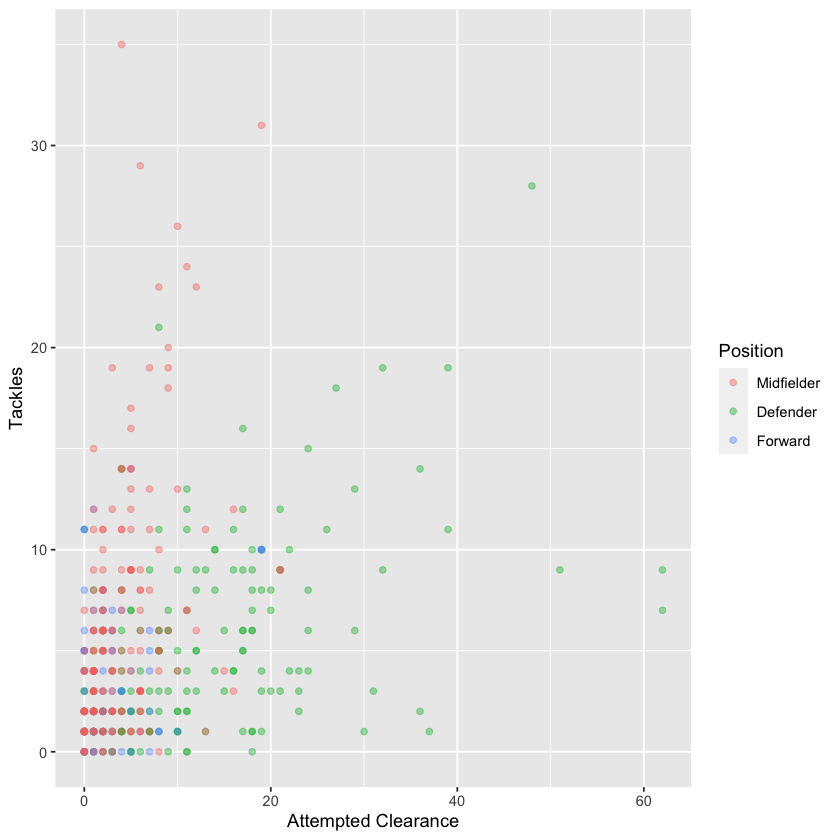

In [14]:
football_plot <- football_train |>
    ggplot(aes(x = clearance_attempted, y = tackles, color = position)) +
    geom_point(alpha = 0.4) +
    labs(x = "Attempted Clearance", y = "Tackles", color = "Position")
football_plot

As the visualization demonstrates, most defenders have high numbers of attempted clearances (the bottom right of the graph). In addition, most midfielders have a high number of tackles (the top left of the graph).

## Methods
### Variables and Columns Used

### Result Visualization Methods

## Expected outcomes and significance

###  Expected Findings 
The goal of the analysis is to predict the position of players who participated in the UEFA Champions League 2021-2022 based on their performance metrics, specifically goals scored and distance covered on the field. We anticipate finding patterns and relationships in the data that allow us to classify players into different positions using a K-Nearest Neighbors (KNN) classification model.

### Impact of Findings
Such findings can have several significant impacts. Firstly, they can provide insights into the key performance indicators for different player positions, aiding coaches and scouts in player recruitment and tactical strategies. Secondly, it can assist in the development of more accurate and data-driven player profiles for fans, analysts, and fantasy football enthusiasts. Lastly, it may contribute to enhancing the overall understanding of player roles and their relationships to performance metrics, potentially influencing player development and training methodologies.

### Future Questions
These findings may lead to several future questions and areas of research. For instance, it could prompt inquiries into how different factors, such as player age, playing style, or team tactics, influence the relationship between goals scored, distance covered, and player position. It could also lead to more sophisticated machine learning models that incorporate additional performance metrics for even more accurate position classification. Furthermore, this analysis could open up discussions on the evolving nature of player positions in modern football and how they are defined in the context of data-driven insights.